<a href="https://colab.research.google.com/github/Bala534/Regproject/blob/main/Cc_and_Cu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
# importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [153]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [154]:
data = pd.read_excel('Cu and Cu Table of Data.xlsx')
data.head()

,S NO,HC (%),NQF (%),C (%),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,0.0,0.00,23.02,2.00,15.00,0.84,2.05
1,2,0.1,0.01,23.02,1.98,15.01,0.85,2.05
2,3,0.2,0.02,23.03,1.96,15.04,0.86,2.06
3,4,0.3,0.03,23.03,1.96,15.09,0.87,2.06
4,5,0.4,0.04,23.04,1.93,15.14,0.88,2.06


In [155]:
data.rename(columns = {'Unnamed: 4':'Ac','Unnamed: 5':'Φ','Unnamed: 6':'Cc','Unnamed: 7':'Cu'}, inplace = True) # Changing the column names

In [156]:
data.head()

,S NO,HC (%),NQF (%),C (%),Ac,Φ,Cc,Cu
0,1,0.0,0.00,23.02,2.00,15.00,0.84,2.05
1,2,0.1,0.01,23.02,1.98,15.01,0.85,2.05
2,3,0.2,0.02,23.03,1.96,15.04,0.86,2.06
3,4,0.3,0.03,23.03,1.96,15.09,0.87,2.06
4,5,0.4,0.04,23.04,1.93,15.14,0.88,2.06


In [157]:
data.shape # no of rows and columns

(121, 8)

In [158]:
data.isna().any()

S NO       False
HC (%)     False
NQF (%)    False
C (%)      False
Ac         False
Φ          False
Cc         False
Cu         False
dtype: bool

In [159]:
data.isna().sum().sum()

0

In [160]:
del data['S NO']

1. Conduct Pearson’s regression to determine the agreement between all parameters with the outputs (Cu and Cc) and present basic linear fittings. 

In [161]:
x = data['Cc'] # taking the Cc column
y = data['Cu'] # taking the Cu column

In [162]:
from scipy.stats import pearsonr 

In [163]:
r, _  = pearsonr(x,y) # calculating the pearson's correlation coefficient for two variables
r 

0.9657678969639488

In [164]:
np.corrcoef(x, y) # another method for calculating the pearson's correlation coefficient for two variables

array([[1.       , 0.9657679],
       [0.9657679, 1.       ]])

In [165]:
corMat = data.corr()
print(corMat)

           HC (%)   NQF (%)     C (%)        Ac         Φ        Cc        Cu
HC (%)   1.000000  1.000000  0.996439 -0.993883  0.992387  0.994610  0.982764
NQF (%)  1.000000  1.000000  0.996439 -0.993883  0.992387  0.994610  0.982764
C (%)    0.996439  0.996439  1.000000 -0.997008  0.993742  0.984554  0.983685
Ac      -0.993883 -0.993883 -0.997008  1.000000 -0.991463 -0.983404 -0.981070
Φ        0.992387  0.992387  0.993742 -0.991463  1.000000  0.980971  0.972374
Cc       0.994610  0.994610  0.984554 -0.983404  0.980971  1.000000  0.965768
Cu       0.982764  0.982764  0.983685 -0.981070  0.972374  0.965768  1.000000


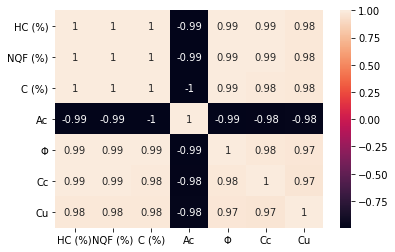

In [166]:
sns.heatmap(corMat, annot=True)
plt.show()

*From the above we can say that there is a positive correlation between Cc and Cu.*

*which clearly says x and y both are strongly correlated with each other.*

Text(0, 0.5, 'Cu')

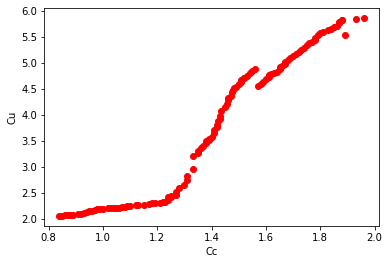

In [167]:
plt.scatter(x,y,color='red')
plt.xlabel('Cc')
plt.ylabel('Cu') 

Text(0, 0.5, 'Cu')

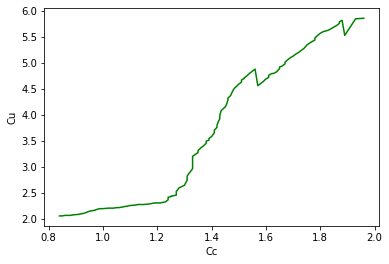

In [168]:
plt.plot(x,y,color='g')
plt.xlabel('Cc')
plt.ylabel('Cu')

2. Present frequency histograms of the variables.


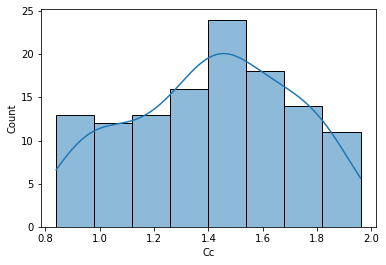

In [169]:
sns.histplot(data=data, x="Cc",kde=True) # histogram for the Cc variable

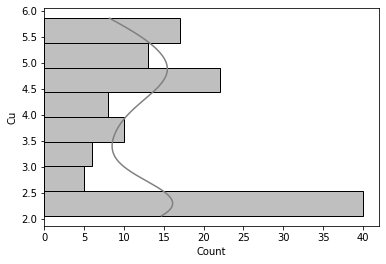

In [170]:
sns.histplot(data=data, y="Cu",color='grey',kde=True) # histogram for the Cu variable

3. Train, Validate and Test. Present the architecture of the program.

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split  

In [172]:
# taking the independent variables and dependent variables
features = data[['HC (%)','NQF (%)','C (%)','Ac','Φ']].values
labels = data[['Cc','Cu']].values

In [173]:
# Now divide the data into train and test. Here we are keeping 20% as our test set
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=2)

In [174]:
poly_regs= PolynomialFeatures(degree= 2)  
z = poly_regs.fit_transform(x_train)  
model =LinearRegression()  
model.fit(z, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
# Predicting for the test data
m = poly_regs.fit_transform(x_test)

In [176]:
y_pred = model.predict(m)
y_pred

array([[1.46310782, 4.23693455],
       [1.296568  , 2.805577  ],
       [1.1601359 , 2.28983488],
       [1.51231768, 4.70232697],
       [1.41072623, 3.69534371],
       [0.88114477, 1.95575245],
       [1.11328574, 2.16052441],
       [1.4298827 , 3.87777294],
       [0.79885162, 2.4815546 ],
       [0.99293146, 2.21889494],
       [1.35401516, 3.21282716],
       [1.12437925, 2.17330334],
       [1.16948304, 2.37898234],
       [0.87567247, 1.96682554],
       [1.78196497, 5.43941473],
       [1.7904945 , 5.47133305],
       [1.65329519, 4.95065524],
       [1.84255335, 5.6341126 ],
       [0.99087767, 2.23895486],
       [1.49052233, 4.5020167 ],
       [1.33586935, 3.07624166],
       [0.89459447, 2.06193953],
       [1.26352358, 2.42017048],
       [1.329082  , 3.00225888],
       [1.24169708, 2.44595913]])

In [177]:
# performing the cross validation using KFold
from sklearn.model_selection import cross_validate,KFold,cross_val_score 

In [178]:
cross_val_score(LinearRegression(),features,labels).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

-43.21816662688811

4. Conduct performance evaluation in comparison between measured and predicted values using MLR, R^2, RMSE, MAE, MSE, and any other evaluation parameter.

In [179]:
mean_absolute_error(y_test,y_pred) # calculating the mean absolute error for actual and predicted values

0.03843532827199089

In [180]:
mean_squared_error(y_test,y_pred) # calculating the mean squared error for actual and predicted values

0.006242877563215767

In [181]:
r2_score(y_test,y_pred) # calculating the r2 error for actual and predicted values

0.9951130046928746

In [182]:
from math import sqrt
rmse = sqrt(r2_score(y_test,y_pred)) # calculating the root mean squared error for actual and predicted values
rmse

0.9975535096890165

5. Present the parametric study graph.

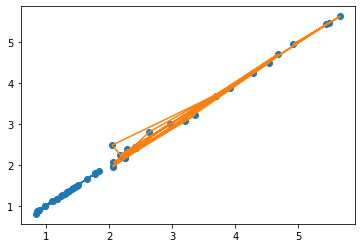

In [183]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred)

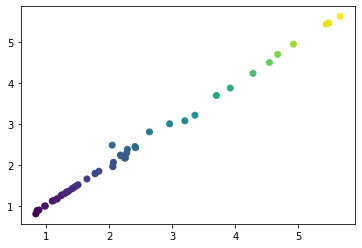

In [184]:
plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis');

6. Conduct sensitivity analysis to determine the influence of each parameter on the predicted parameters.

In [185]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

M, n = make_regression(n_samples=500, n_features=5, n_informative=2, noise=0.3)
M = pd.DataFrame(M, columns=['HC (%)','NQF (%)','C (%)','Ac','Φ'])

model = XGBRegressor()
model.fit(M, n)

[08:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

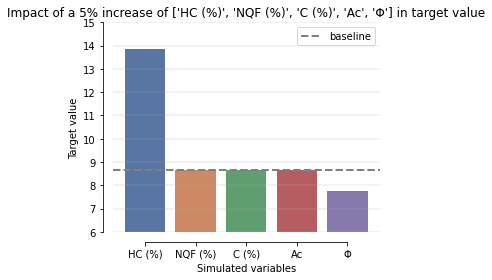

In [186]:
class Simulate:
    def __init__(self, obs, var):
        self.obs = obs
        self.var = var

    def simulate_increase(self, model, percentage):
        baseline = model.predict(self.obs)
        plus = {}
        for ivar in self.var:
            M_plus = self.obs.copy()
            M_plus[ivar] = M_plus[ivar] + M_plus[ivar] * (percentage / 100)
            plus[ivar] = model.predict(M_plus)
        b = pd.DataFrame(
            plus, index=['simulated'
                         ]).T.reset_index().rename(columns={'index': 'test'})
        b['baseline'] = baseline[0]
        return b

    @staticmethod
    def plot_simulation(d, **kwargs):
        fig, ax = plt.subplots()
        sns.barplot(x='test', y='simulated', data=d, palette='deep', ax=ax)
        ax.axhline(d['baseline'].values[0], color='grey', linestyle='--', linewidth=2)
        ax.plot([0, 0], [-100, -100], color='grey', linestyle='--', linewidth=2, label='baseline')

        maxi = int(d['simulated'].max() + d['simulated'].max() * 0.1)
        mini = int(d['simulated'].min() - d['simulated'].min() * 0.1)
        ax.set_ylim([mini, maxi])

        ax.set_xlabel('Simulated variables')
        ax.set_ylabel('Target value')
        ax.set_title(kwargs.get('title'))
        ax.legend()

        ax.grid(axis='y', linewidth=.3)
        sns.despine(offset=10, trim=True)
        plt.tight_layout()
        plt.show()


VAR_OPTIMIZE = ['HC (%)','NQF (%)','C (%)','Ac','Φ']
PERC = 5
ROW = M.iloc[[29]]

S = Simulate(obs=ROW, var=VAR_OPTIMIZE)
d = S.simulate_increase(model=model, percentage=PERC)
S.plot_simulation(d, title=f'Impact of a {PERC}% increase of {VAR_OPTIMIZE} in target value')